# Business Case

Kamu diminta untuk membangun model yang dapat **memprediksi credit risk** menggunakan dataset yang disediakan oleh company yang terdiri dari data pinjaman yang diterima dan yang ditolak. Selain itu kamu juga perlu mempersiapkan media visual untuk mempresentasikan solusi ke klien. Pastikan media visual yang kamu buat jelas, mudah dibaca, dan komunikatif.


Tahapan Pengerjaan Tugas:
1. File dataset yang disediakan terdiri dari satu file data (format csv) dan satu data dictionary (format xlsx) yang berisikan informasi mengenai masing-masing kolom yang ada pada file data. Silahkan pelajari informasi mengenai data tersebut untuk mengetahui langkah apa yang perlu dilakukan untuk mempersiapkan data
2. Siapkan tools yang akan kamu gunakan untuk membantu pengerjaan soal seperti yang telah dijelaskan di prerequisite, lalu import data untuk mempersiapkan pengerjaan.
3. Kerjakan tugas dan siapkan seluruh file yang perlu kamu kumpulkan dengan mengacu kepada No. 6
4. Gabung ketiga file yang telah kamu selesaikan dalam satu folder ZIP yang diberi judul "[Nama Lengkap]_VIX_ID/X Partners"
5. Submit tugasmu hanya dalam bentuk folder ZIP sesuai ketentuan di No. 4
6. Terdapat dua skenario pengumpulan tugas berdasarkan bahasa pemrograman yang kamu gunakan untuk mengerjakan final project ini. Silahkan cek dibawah ini untuk detailnya:

Apabila kamu menggunakan Python untuk mengerjakan tugas ini, kamu perlu mengumpulkan:
- File Code dengan format .py
- File Python Notebook dengan format .ipynb
- File infografis sebagai media presentasi end-to-end solution yang telah kamu buat


## Column Details
- annual_income: This feature measures the borrower's annual income. Borrowers with higher incomes are generally considered to be **less risky** because they have more money to repay their loans.

- funded_amount: This feature measures the amount of the loan that was funded. Borrowers who borrow less money are generally considered to be **less risky** because they have less debt to manage.

- grade: This feature is a letter grade that is assigned to the loan by the lender. The grade is based on the lender's assessment of the borrower's creditworthiness and the risk of default. Loans with higher grades are generally considered to be less risky.

- home_ownership: This feature indicates whether the borrower owns or rents their home. Homeowners are generally considered to be less risky because they have more assets and are less likely to move.

- installment: This feature measures the monthly payment on the loan. Borrowers with lower monthly payments are generally considered to be less risky because they are more likely to be able to afford their payments.

- int_rate: This feature measures the interest rate on the loan. Borrowers with lower interest rates are generally considered to be less risky because they are paying less interest on their loans.

- last_payment_amount: This feature measures the amount of the last payment that the borrower made on the loan. Borrowers who have made all of their payments on time and in full are generally considered to be less risky.

- loan_amount: This feature measures the total amount of the loan. Borrowers who borrow less money are generally considered to be less risky because they have less debt to manage.

- member_id: This feature is a unique identifier for the borrower. It is not generally used to predict credit score, but it may be used to identify the borrower in other data sets.

- out_prncp_inv: This feature measures the outstanding principal balance on the loan. Borrowers with lower outstanding balances are generally considered to be less risky.

- purpose: This feature indicates the purpose of the loan (e.g., debt consolidation, home improvement, etc.). Lenders may use this information to assess the borrower's risk of default.

- recoveries: This feature measures the amount of money that the lender has recovered on defaulted loans. Lenders may use this information to assess the borrower's risk of default.

- revol_util: This feature measures the amount of revolving credit that the borrower is using relative to their total available credit. Borrowers with lower revolving credit utilization rates are generally considered to be less risky.

- sub_grade: This feature is a more granular version of the grade feature. It takes into account additional factors, such as the borrower's debt-to-income ratio and credit history length. Loans with higher sub-grades are generally considered to be less risky.

- term: This feature measures the length of the loan in months. Loans with shorter terms are generally considered to be less risky because the borrower has less time to default.

- total_pymnt: This feature measures the total amount that the borrower will repay on the loan, including principal and interest. Borrowers with lower total payments are generally considered to be less risky.

- total_pymnt_inv: This feature measures the total amount of money that the lender has invested in the loan, including principal and interest. Borrowers with lower total investment amounts are generally considered to be less risky.

- total_rec_int: This feature measures the total amount of interest that the lender has received on the loan. Borrowers who have paid more interest are generally considered to be less risky.

- total_rec_late_fee: This feature measures the total amount of late fees that the lender has received from the borrower. Borrowers who have paid fewer late fees are generally considered to be less risky.

- total_rec_prncp: This feature measures the total amount of principal that the lender has received from the borrower. Borrowers who have repaid more principal are generally considered to be less risky.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, roc_auc_score
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn import metrics


# Data Collection

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VIX Rakamin/loan_data_2007_2014.csv')
df.head(2)

<ipython-input-4-26daa00958d0>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VIX Rakamin/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
df[['title','home_ownership','loan_status','loan_amnt','emp_title']]

,title,home_ownership,loan_status,loan_amnt,emp_title
0,Computer,RENT,Fully Paid,5000,NaN
1,bike,RENT,Charged Off,2500,Ryder
2,real estate business,RENT,Fully Paid,2400,NaN
3,personel,RENT,Fully Paid,10000,AIR RESOURCES BOARD
4,Personal,RENT,Current,3000,University Medical Group
...,...,...,...,...,...
466280,Debt consolidation,MORTGAGE,Current,18400,Financial Advisor
466281,Debt consolidation,MORTGAGE,Charged Off,22000,Chief of Interpretation (Park Ranger)
466282,Debt consolidation,MORTGAGE,Current,20700,patrol
466283,Credit card refinancing,OWN,Fully Paid,2000,Server Engineer Lead


# Data Cleaning

## Check Duplicated

In [7]:
df.duplicated().sum()

0

## Drop Missing Values

In [8]:
missing_columns = ['addr_state','desc','earliest_cr_line','emp_length','emp_title','inq_last_6mths',
                  'issue_d','mths_since_last_delinq','mths_since_last_record','title','url','zip_code','id',
                  'Unnamed: 0']
df = df.drop(axis=1, columns=missing_columns)

In [9]:
df.isna().sum()

member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 61, dtype: int64

In [10]:
df.dropna()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m


## Correlated Columns

In [11]:
df = df.loc[:,['annual_inc','funded_amnt','grade','home_ownership','installment','int_rate','last_pymnt_amnt','loan_amnt','member_id','out_prncp_inv','purpose','recoveries','revol_util','term', 'total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp']]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   annual_inc          466281 non-null  float64
 1   funded_amnt         466285 non-null  int64  
 2   grade               466285 non-null  object 
 3   home_ownership      466285 non-null  object 
 4   installment         466285 non-null  float64
 5   int_rate            466285 non-null  float64
 6   last_pymnt_amnt     466285 non-null  float64
 7   loan_amnt           466285 non-null  int64  
 8   member_id           466285 non-null  int64  
 9   out_prncp_inv       466285 non-null  float64
 10  purpose             466285 non-null  object 
 11  recoveries          466285 non-null  float64
 12  revol_util          465945 non-null  float64
 13  term                466285 non-null  object 
 14  total_pymnt         466285 non-null  float64
 15  total_pymnt_inv     466285 non-nul

In [13]:
df

,annual_inc,funded_amnt,grade,home_ownership,installment,int_rate,last_pymnt_amnt,loan_amnt,member_id,out_prncp_inv,purpose,recoveries,revol_util,term,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
0,24000.0,5000,B,RENT,162.87,10.65,171.62,5000,1296599,0.00,credit_card,0.00,83.7,36 months,5861.071414,5831.78,861.07,0.00,5000.00
1,30000.0,2500,C,RENT,59.83,15.27,119.66,2500,1314167,0.00,car,117.08,9.4,60 months,1008.710000,1008.71,435.17,0.00,456.46
2,12252.0,2400,C,RENT,84.33,15.96,649.91,2400,1313524,0.00,small_business,0.00,98.5,36 months,3003.653644,3003.65,603.65,0.00,2400.00
3,49200.0,10000,C,RENT,339.31,13.49,357.48,10000,1277178,0.00,other,0.00,21.0,36 months,12226.302210,12226.30,2209.33,16.97,10000.00
4,80000.0,3000,B,RENT,67.79,12.69,67.79,3000,1311748,766.90,other,0.00,53.9,60 months,3242.170000,3242.17,1009.07,0.00,2233.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,110000.0,18400,C,MORTGAGE,432.64,14.47,432.64,18400,1440975,12574.00,debt_consolidation,0.00,77.6,60 months,10383.360000,10383.36,4557.36,0.00,5826.00
466281,78000.0,22000,D,MORTGAGE,582.50,19.97,17.50,22000,11536848,0.00,debt_consolidation,0.00,46.3,60 months,4677.920000,4677.92,2840.88,0.00,1837.04
466282,46000.0,20700,D,MORTGAGE,514.34,16.99,514.34,20700,11436914,14428.31,debt_consolidation,0.00,51.1,60 months,12343.980000,12343.98,6072.29,0.00,6271.69
466283,83000.0,2000,A,OWN,62.59,7.90,1500.68,2000,11457002,0.00,credit_card,0.00,21.5,36 months,2126.579838,2126.58,126.58,0.00,2000.00


In [14]:
df.describe()

,annual_inc,funded_amnt,installment,int_rate,last_pymnt_amnt,loan_amnt,member_id,out_prncp_inv,recoveries,revol_util,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
count,4.662810e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,465945.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000
mean,7.327738e+04,14291.801044,432.061201,13.829236,3123.913796,14317.277577,1.459766e+07,4408.452258,85.344211,56.176947,11540.686220,11469.892747,2588.677225,0.650129,8866.014657
std,5.496357e+04,8274.371300,243.485550,4.357587,5554.737393,8286.509164,1.168237e+07,6353.198001,552.216084,23.732628,8265.627112,8254.157579,2483.809661,5.265730,7031.687997
min,1.896000e+03,500.000000,15.670000,5.420000,0.000000,500.000000,7.047300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000e+04,8000.000000,256.690000,10.990000,312.620000,8000.000000,4.379705e+06,0.000000,0.000000,39.200000,5552.125349,5499.250000,957.280000,0.000000,3708.560000
50%,6.300000e+04,12000.000000,379.890000,13.660000,545.960000,12000.000000,1.194108e+07,441.380000,0.000000,57.600000,9419.250943,9355.430000,1818.880000,0.000000,6817.760000
75%,8.896000e+04,20000.000000,566.580000,16.490000,3187.510000,20000.000000,2.300154e+07,7338.390000,0.000000,74.700000,15308.158460,15231.310000,3304.530000,0.000000,12000.000000
max,7.500000e+06,35000.000000,1409.990000,26.060000,36234.440000,35000.000000,4.086083e+07,32160.380000,33520.270000,892.300000,57777.579870,57777.580000,24205.620000,358.680000,35000.030000


In [15]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,annual_inc,funded_amnt,installment,int_rate,last_pymnt_amnt,loan_amnt,member_id,out_prncp_inv,recoveries,revol_util,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
annual_inc,1.000000,0.370311,0.368145,-0.046072,0.142155,0.370893,0.024921,0.168316,0.016954,0.037582,0.299784,0.298728,0.212951,0.020273,0.275823
funded_amnt,0.370311,1.000000,0.951787,0.167921,0.304178,0.998548,0.073942,0.521412,0.110338,0.118885,0.743363,0.743441,0.715664,0.043350,0.612318
installment,0.368145,0.951787,1.000000,0.148790,0.299867,0.949666,0.042639,0.408811,0.105666,0.136852,0.764360,0.763895,0.641948,0.052341,0.663399
int_rate,-0.046072,0.167921,0.148790,1.000000,0.075609,0.167183,-0.028278,0.137451,0.127893,0.323365,0.127035,0.129166,0.485154,0.057875,-0.032130
last_pymnt_amnt,0.142155,0.304178,0.299867,0.075609,1.000000,0.304243,-0.076851,-0.317359,-0.070722,-0.010453,0.614276,0.614216,0.050888,-0.034820,0.709676
loan_amnt,0.370893,0.998548,0.949666,0.167183,0.304243,1.000000,0.070210,0.518660,0.110691,0.117756,0.743841,0.743580,0.715876,0.043650,0.612777
member_id,0.024921,0.073942,0.042639,-0.028278,-0.076851,0.070210,1.000000,0.448092,-0.066358,-0.010093,-0.282848,-0.273351,-0.142031,-0.043115,-0.277070
out_prncp_inv,0.168316,0.521412,0.408811,0.137451,-0.317359,0.518660,0.448092,1.000000,-0.107241,0.096724,-0.022141,-0.016681,0.488019,-0.006712,-0.189983
recoveries,0.016954,0.110338,0.105666,0.127893,-0.070722,0.110691,-0.066358,-0.107241,1.000000,0.033113,-0.022421,-0.023904,0.030691,0.072703,-0.115784
revol_util,0.037582,0.118885,0.136852,0.323365,-0.010453,0.117756,-0.010093,0.096724,0.033113,1.000000,0.085961,0.088272,0.209685,0.024657,0.024355


<ipython-input-16-8da5b29ac263>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


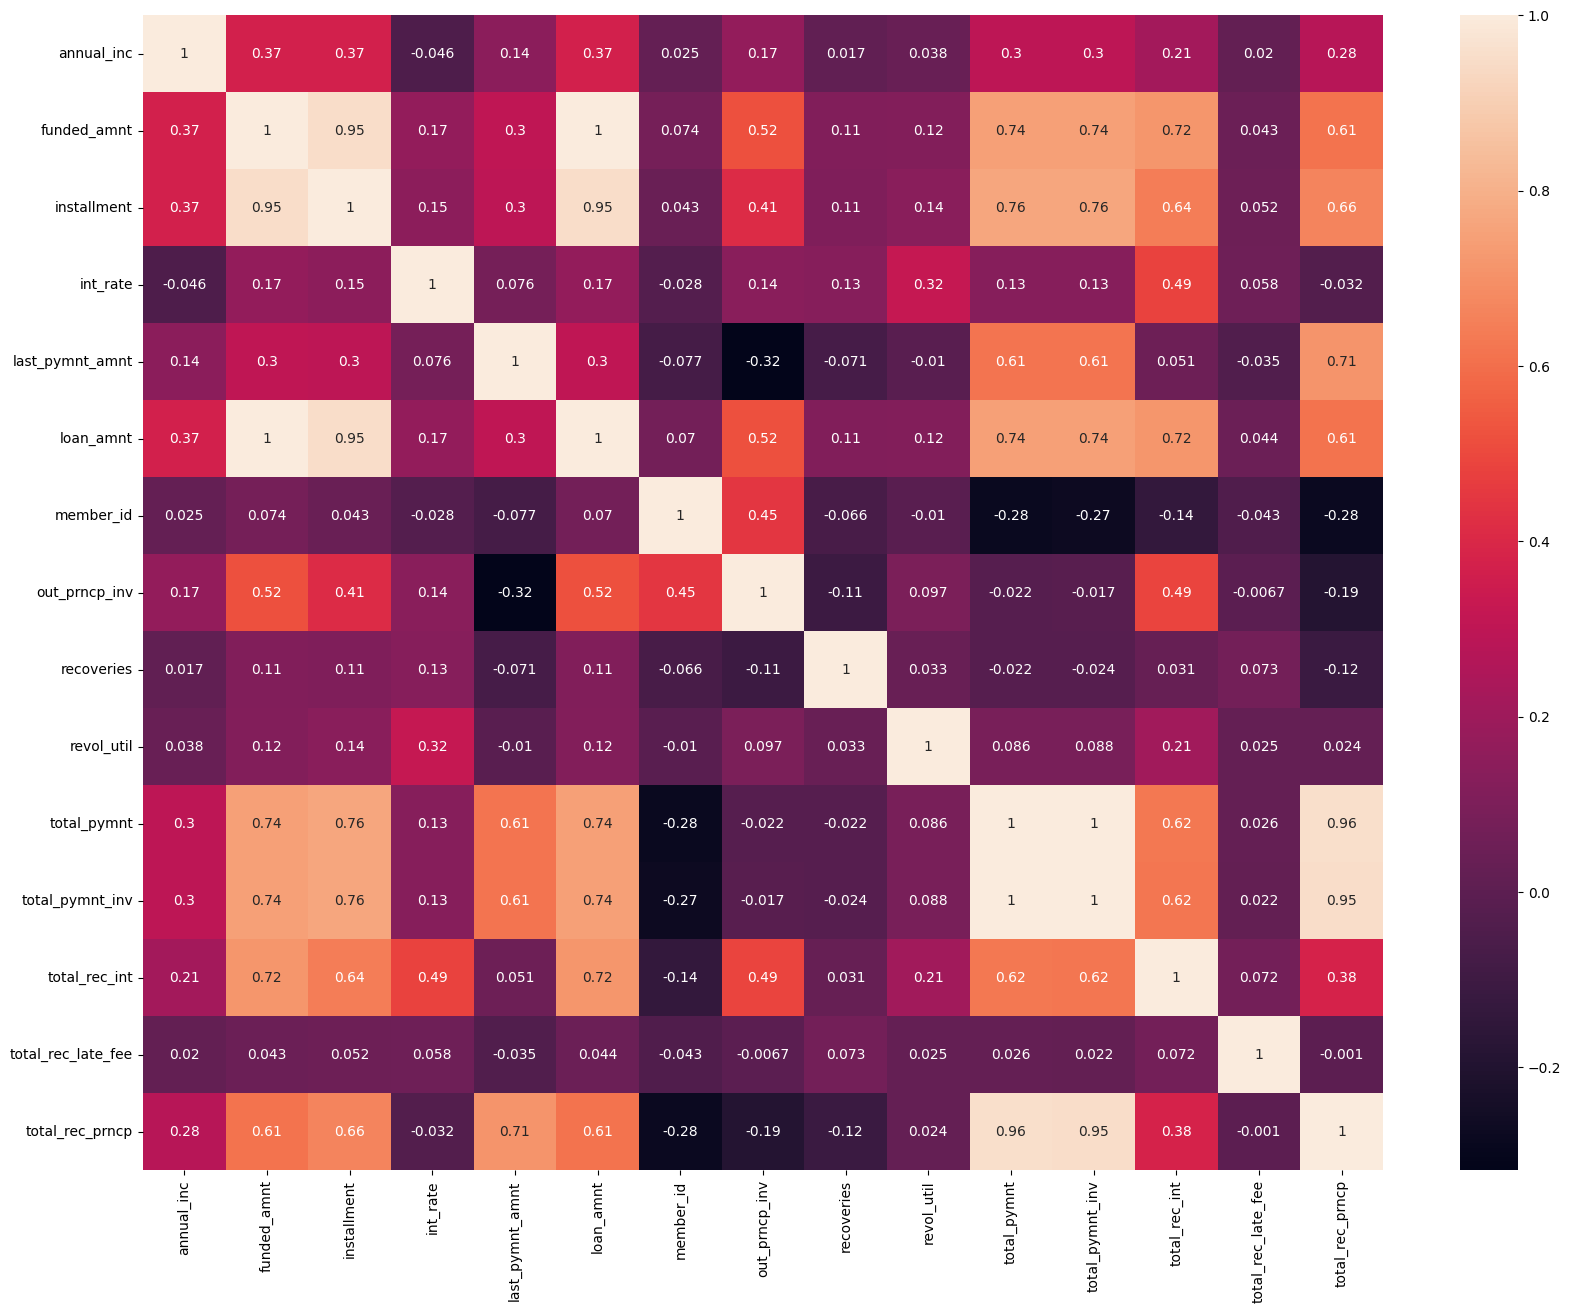

In [16]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

# EDA

## Grade
LC assigned loan grades are a classification system used by some lenders to evaluate the creditworthiness of borrowers and the risk of default on loans. The grades range from A to G, with A being the highest quality loan and G being the lowest quality loan.


1. A: Excellent credit quality, very low risk of default
2. B: Good credit quality, low risk of default
3. C: Average credit quality, moderate risk of default
4. D: Below average credit quality, high risk of default
5. E: Poor credit quality, very high risk of default
6. F: Very poor credit quality, imminent risk of default
7. G: Unclassifiable

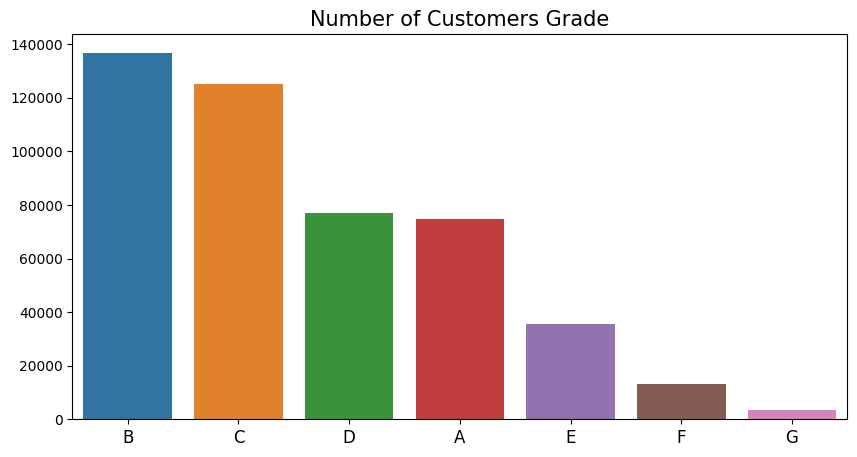

In [17]:
df_grade = df.groupby('grade').agg({
    'member_id' : 'nunique'
}).reset_index()

df_grade.rename(columns={
    'member_id' : 'member_count'
}, inplace=True)

# df.groupby('grade').grade.count()

plt.figure(figsize=(10,5))

sns.barplot(
    y="member_count",
    x='grade',
    data = df_grade.sort_values(by='member_count', ascending=False)
)

plt.title("Number of Customers Grade", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [18]:
df_grade

,grade,member_count
0,A,74867
1,B,136929
2,C,125293
3,D,76888
4,E,35757
5,F,13229
6,G,3322


## Homeowners
Homeowners may be less likely to default on loans because they have a stake in their property.


**Homeownership** is the act of owning a home. It is one of the most significant financial investments that a person can make. Homeowners can build equity in their homes over time, and they can also benefit from the tax advantages of homeownership.

**Mortgage** is a loan that is used to purchase a home. The borrower agrees to repay the loan over a period of time, typically with interest. The lender has a lien on the home, which means that they can foreclose on the home if the borrower defaults on the loan.

**Rent** is the monthly payment that a tenant makes to a landlord to live in a property. The rent payment typically covers the cost of housing, utilities, and maintenance.

**Own** a home means that you have legal title to the property and are responsible for all aspects of its ownership, including making mortgage payments, paying property taxes and insurance, and maintaining the property.

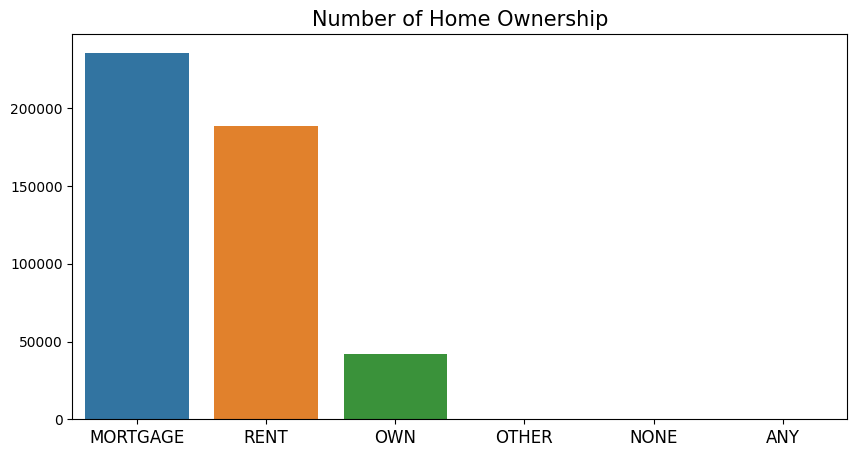

In [19]:
df_home_ownership = df.groupby('home_ownership').agg({
    'member_id' : 'nunique'
}).reset_index()

df_home_ownership.rename(columns={
    'member_id' : 'member_count'
},inplace=True)

plt.figure(figsize=(10,5))

sns.barplot(
    y="member_count",
    x="home_ownership",
    data = df_home_ownership.sort_values(by='member_count', ascending=False)
)

plt.title("Number of Home Ownership", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [20]:
df_home_ownership

,home_ownership,member_count
0,ANY,1
1,MORTGAGE,235875
2,NONE,50
3,OTHER,182
4,OWN,41704
5,RENT,188473


In [21]:
df.head(2)

,annual_inc,funded_amnt,grade,home_ownership,installment,int_rate,last_pymnt_amnt,loan_amnt,member_id,out_prncp_inv,purpose,recoveries,revol_util,term,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
0,24000.0,5000,B,RENT,162.87,10.65,171.62,5000,1296599,0.0,credit_card,0.00,83.7,36 months,5861.071414,5831.78,861.07,0.0,5000.00
1,30000.0,2500,C,RENT,59.83,15.27,119.66,2500,1314167,0.0,car,117.08,9.4,60 months,1008.710000,1008.71,435.17,0.0,456.46


In [22]:
df[['annual_inc','funded_amnt','home_ownership']].max()

annual_inc        7500000.0
funded_amnt           35000
home_ownership         RENT
dtype: object

# Feature Scaling & Encoding

## Scaling

In [23]:
scaler = StandardScaler()
df[['annual_inc','funded_amnt','installment','int_rate','last_pymnt_amnt','loan_amnt','out_prncp_inv','recoveries','revol_util', 'total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp']] = scaler.fit_transform(df[['annual_inc','funded_amnt','installment','int_rate','last_pymnt_amnt','loan_amnt','out_prncp_inv','recoveries','revol_util', 'total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp']])

In [24]:
df.tail()

,annual_inc,funded_amnt,grade,home_ownership,installment,int_rate,last_pymnt_amnt,loan_amnt,member_id,out_prncp_inv,purpose,recoveries,revol_util,term,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
466280,0.668127,0.496497,C,MORTGAGE,0.002377,0.147046,-0.484501,0.492696,1440975,1.285267,debt_consolidation,-0.154549,0.902685,60 months,-0.140017,-0.131635,0.792607,-0.123464,-0.432331
466281,0.085923,0.931576,D,MORTGAGE,0.617856,1.409214,-0.559237,0.927137,11536848,-0.693896,debt_consolidation,-0.154549,-0.416176,60 months,-0.830279,-0.822856,0.101539,-0.123464,-0.999615
466282,-0.496282,0.774464,D,MORTGAGE,0.337921,0.725348,-0.469793,0.770256,11436914,1.577138,debt_consolidation,-0.154549,-0.213923,60 months,0.097185,0.105897,1.402530,-0.123464,-0.368948
466283,0.176892,-1.485528,A,OWN,-1.517427,-1.360671,-0.292225,-1.486427,11457002,-0.693896,credit_card,-0.154549,-1.461152,36 months,-1.138948,-1.131954,-0.991259,-0.123464,-0.976440
466284,-0.496282,-0.518687,D,MORTGAGE,-0.264826,1.232510,-0.496214,-0.521001,11061576,-0.068319,other,-0.154549,0.616159,36 months,-0.328961,-0.323513,0.087496,-0.123464,-0.405365


## Label Encoding

**grade**
- 0 : A
- 1 : B
- 2 : C
- 3 : D
- 4 : E
- 5 : F
- 6: G

In [25]:
# encode = df[['grade','sub_grade','home_ownership','term']]
# encoder = LabelEncoder()
# df_encoded = encoder.fit(['grade','sub_grade','home_ownership','term'])
# encoded_data = encoder.transform(df_encoded)
# df_encoded = pd.DataFrame(encoded_data, columns=['grade','sub_grade','home_ownership','term'])
# df_encoded.tail()

# import  numpy as np
# encode = df[['grade','sub_grade','home_ownership','term']].values.ravel()
# encode = np.reshape(encode, (-1, 1))
# encoder = OneHotEncoder()
# # df_encoded = encoder.fit_transform(encode)
# # # Transform the data using the OneHotEncoder object
# df_encoded = encoder.fit_transform(encode.reshape(-1, 1))
# df_encoded = pd.DataFrame(df_encoded, columns=['grade','sub_grade','home_ownership','term'])
# df_encoded.tail()

encoder = LabelEncoder()
df['grade'] = encoder.fit_transform(df['grade'])
df.tail(2)

,annual_inc,funded_amnt,grade,home_ownership,installment,int_rate,last_pymnt_amnt,loan_amnt,member_id,out_prncp_inv,purpose,recoveries,revol_util,term,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
466283,0.176892,-1.485528,0,OWN,-1.517427,-1.360671,-0.292225,-1.486427,11457002,-0.693896,credit_card,-0.154549,-1.461152,36 months,-1.138948,-1.131954,-0.991259,-0.123464,-0.976440
466284,-0.496282,-0.518687,3,MORTGAGE,-0.264826,1.232510,-0.496214,-0.521001,11061576,-0.068319,other,-0.154549,0.616159,36 months,-0.328961,-0.323513,0.087496,-0.123464,-0.405365


In [26]:
# df_encode_homeownership = encoder.fit_transform(df['home_ownership'])
# df_encode_homeownership = pd.DataFrame({"home_ownership": df_home_ownership})
# # df_encode_homeownership = df_encode_homeownership.reshape(-1, 1)
# # df_encode_homeownership = scaler.fit_transform(df['home_ownership'])
# df_encode_homeownership

# # df_encode_homeownership = np.expand_dims(df_encode_homeownership, axis=1)

# #df_encode_homeownership = pd.DataFrame({"home_ownership": df_home_ownership})

# # df_home_ownership.tail()

df['home_ownership'] = encoder.fit_transform(df['home_ownership'])
df['home_ownership'] = scaler.fit_transform(df[['home_ownership']])

In [27]:
df['term'] = encoder.fit_transform(df['term'])

In [28]:
df.head(2)

,annual_inc,funded_amnt,grade,home_ownership,installment,int_rate,last_pymnt_amnt,loan_amnt,member_id,out_prncp_inv,purpose,recoveries,revol_util,term,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
0,-0.896547,-1.122963,1,1.096523,-1.105575,-0.729587,-0.531492,-1.124392,1296599,-0.693896,credit_card,-0.154549,1.159715,0,-0.687137,-0.683064,-0.695548,-0.123464,-0.549800
1,-0.787384,-1.425101,2,1.096523,-1.528763,0.330634,-0.540846,-1.426088,1314167,-0.693896,car,0.057470,-1.970999,1,-1.274191,-1.267385,-0.867019,-0.123464,-1.195952


In [29]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

# Data Modelling

In [30]:
X = df[['annual_inc','funded_amnt','installment','int_rate','last_pymnt_amnt','loan_amnt','out_prncp_inv','recoveries','revol_util', 'total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp']]
Y = df['grade']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

## XGBoost

In [32]:
xgb_model = xgb.XGBRegressor()
xgb_model = xgb_model.fit(X_train, y_train)
y_pred3 = xgb_model.predict(X_test)

## Decision Tree

In [33]:
imputer = SimpleImputer(strategy='median')
pipeline = Pipeline([('imputer', imputer), ('dt', DecisionTreeClassifier())])

pipeline.fit(X_train, y_train)

y_pred2 = pipeline.predict(X_test)

## Random Forest

In [34]:
imputer = SimpleImputer(strategy='median')
pipeline = Pipeline([('imputer', imputer), ('clf', RandomForestClassifier())])

pipeline.fit(X_train, y_train)

y_pred1 = pipeline.predict(X_test)

# Model Evaluation

## Errors

In [35]:
accuracy = accuracy_score(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)

print("="*10,"Decision Tree","="*10)
print('Accuracy :', accuracy)
print('R2 :', r2)
print('MAE :', mae)
print('MSE :', mse)

========== Decision Tree ==========
Accuracy : 0.9729457306153961
R2 : 0.9817607338989977
MAE : 0.028609112452684517
MSE : 0.031976151924252336


In [36]:
accuracy = accuracy_score(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)

print("="*10,"Random Forest","="*10)
print('Accuracy :', accuracy)
print('R2 :', r2)
print('MAE :', mae)
print('MSE :', mse)

========== Random Forest ==========
Accuracy : 0.9509098512712183
R2 : 0.9642615587430728
MAE : 0.053175632928359265
MSE : 0.06265481411583045


In [37]:
r2 = r2_score(y_test, y_pred3)
mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)

print("="*10,"XGBoost Model","="*10)
print('R2 :', r2)
print('MAE :', mae)
print('MSE :', mse)

========== XGBoost Model ==========
R2 : 0.9761735388022774
MAE : 0.09184379147644525
MSE : 0.04177133766548924
